Customer Analysis Round 4

- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [48]:
import pandas as pd
import numpy as np

In [49]:
data = pd.read_csv("../Day 3/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [50]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [51]:
data._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [52]:
data.select_dtypes(object)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [53]:
import numpy as np

numerical = data.select_dtypes(include=np.number)
categoricals = data.select_dtypes(include=np.object)

In [54]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

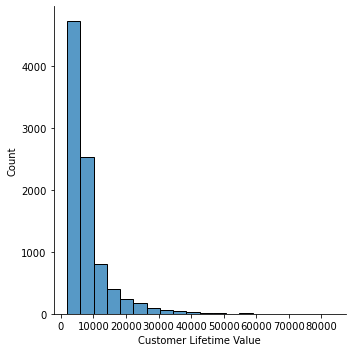

In [56]:
#Use seaborn library to construct distribution plots for the numerical variables
sns.displot(numerical['Customer Lifetime Value'],bins=20)
plt.show()

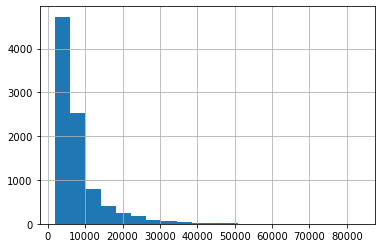

In [57]:
#Use Matplotlib to construct histograms
data['Customer Lifetime Value'].hist(bins=20)
plt.show()

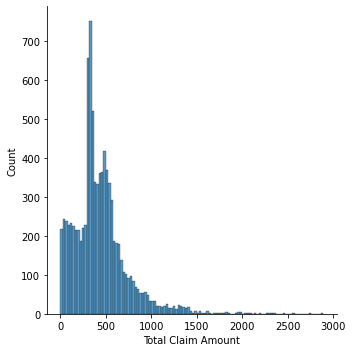

In [76]:
#Do the distributions for different numerical variables look like a normal distribution
sns.displot(data['Total Claim Amount'])
plt.show()

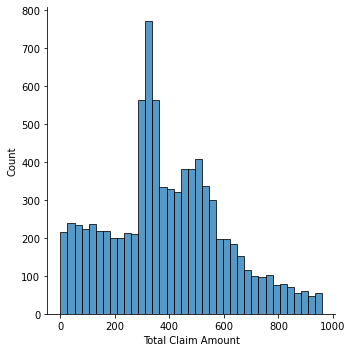

In [67]:
iqr1 = np.percentile(numerical['Total Claim Amount'],75) - np.percentile(numerical['Total Claim Amount'],25)
upper_limit = np.percentile(numerical['Total Claim Amount'],75) + 1.5*iqr1
lower_limit = np.percentile(numerical['Total Claim Amount'],25) - 1.5*iqr1
numerical = numerical[(numerical['Total Claim Amount']>lower_limit) & (numerical['Total Claim Amount']<upper_limit)]
sns.displot(numerical['Total Claim Amount'])
plt.show()

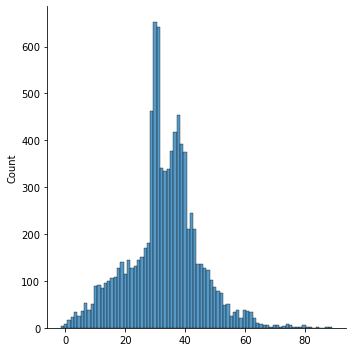

In [69]:
from scipy import stats
xt, lmbda = stats.boxcox(data['Total Claim Amount'])
sns.displot(xt)
plt.show()

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [72]:
reduced_numerical = numerical.drop(['Income','Total Claim Amount_'],axis=1)

In [74]:
correlation_matrix = reduced_numerical.corr()
correlation_matrix



,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Income_
Customer Lifetime Value,1.000000,0.355564,0.006475,-0.000172,-0.033197,0.018780,0.134456,0.044729
Monthly Premium Auto,0.355564,1.000000,-0.016350,0.011024,-0.017310,-0.022519,0.446886,0.045564
Months Since Last Claim,0.006475,-0.016350,1.000000,-0.050453,0.007570,0.006775,-0.017016,-0.023441
Months Since Policy Inception,-0.000172,0.011024,-0.050453,1.000000,-0.003625,-0.017349,-0.017188,0.000063
Number of Open Complaints,-0.033197,-0.017310,0.007570,-0.003625,1.000000,0.003961,-0.015980,0.002830
Number of Policies,0.018780,-0.022519,0.006775,-0.017349,0.003961,1.000000,-0.012835,-0.005389
Total Claim Amount,0.134456,0.446886,-0.017016,-0.017188,-0.015980,-0.012835,1.000000,-0.368590
Income_,0.044729,0.045564,-0.023441,0.000063,0.002830,-0.005389,-0.368590,1.000000


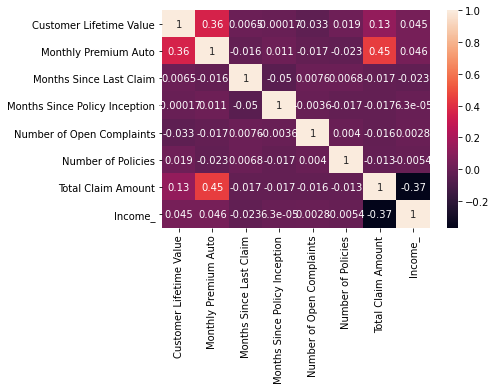

In [75]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

## No pair of features have a high correlation